
Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000
sepal_length - Skewness: 0.31, Kurtosis: -0.57
sepal_width - Skewness: 0.33, Kurtosis: 0.24
petal_length - Skewness: -0.27, Kurtosis: -1.40
petal_width - Skewness: -0.10, Kurtosis: -1.34
species - Skewness: 0.00, Kurtosis: -1.50

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width   species
sepal_

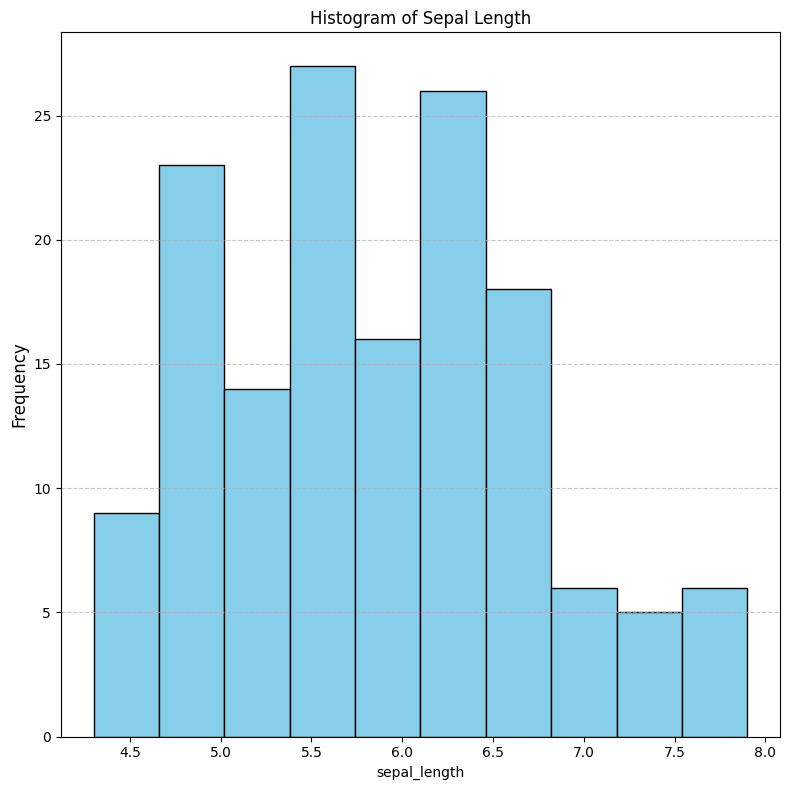

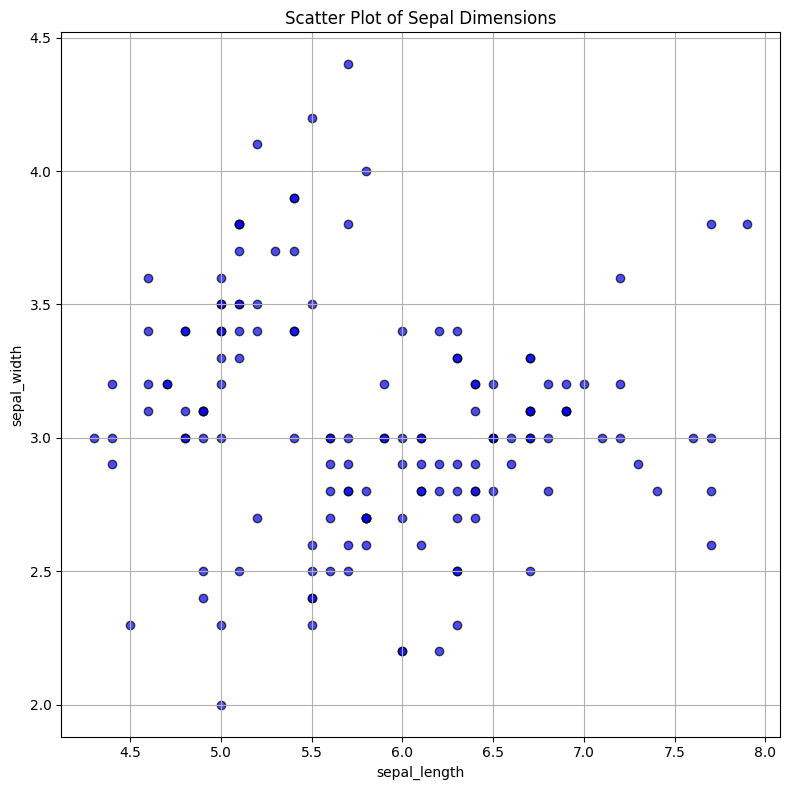

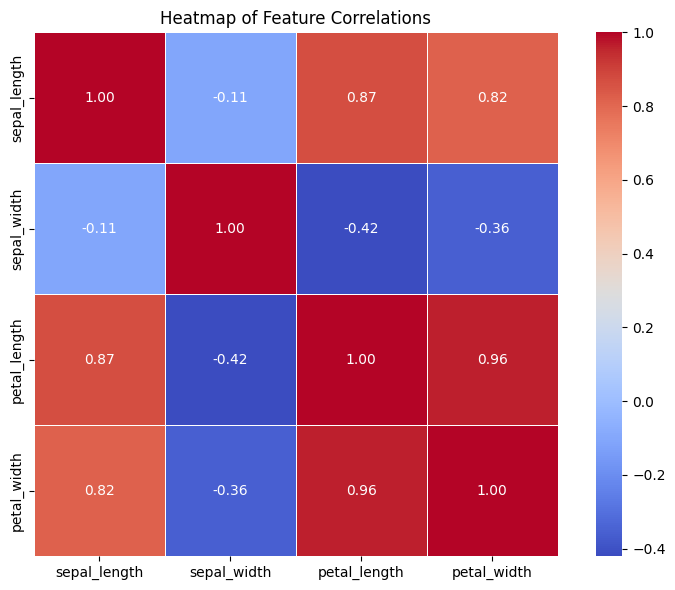

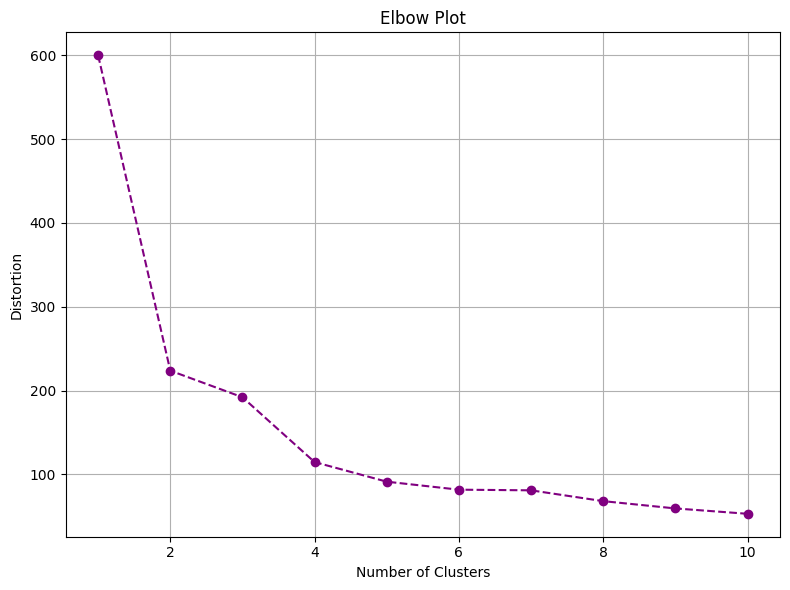

   sepal_length  sepal_width  Cluster
0           5.1          3.5        1
1           4.9          3.0        2
2           4.7          3.2        2
3           4.6          3.1        2
4           5.0          3.6        1


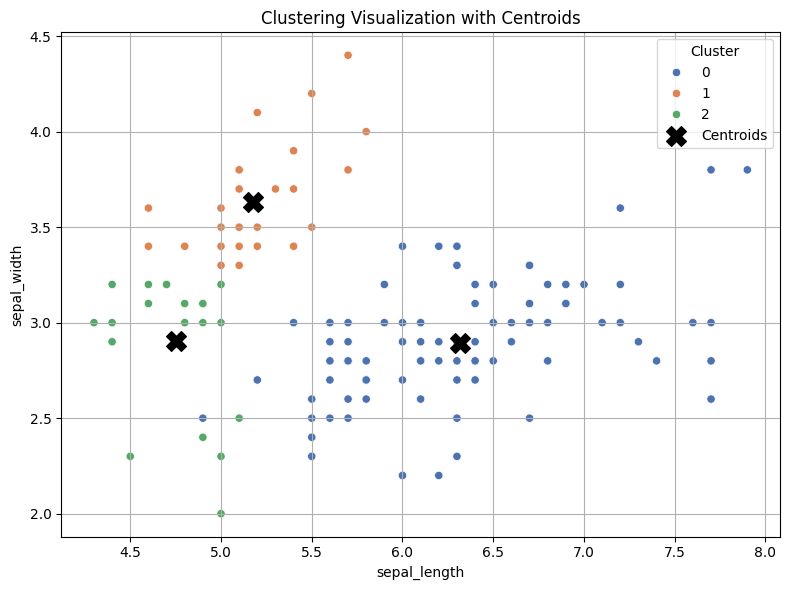

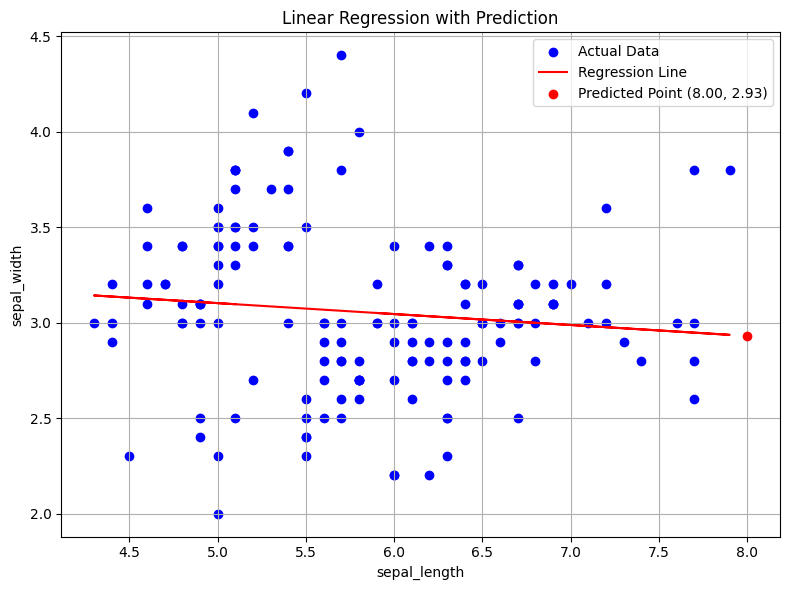

Predicted value at sepal_length = 8.00: sepal_width = 2.93


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Step 1: Loading the dataset
def load_dataset():
    """
    Function to load the Iris dataset from a URL.
    """
    dataset_url = "C:/Users/gf/Desktop/iris.csv"
    iris = pd.read_csv(dataset_url)
    return iris

# Step 2: Preprocessing and cleaning the dataset
def preprocess_dataset(data):
    """
    Function to preprocess the Iris dataset.
    Handles missing values and encodes categorical columns if needed.
    """
    data.dropna(inplace=True)
    if 'species' in data.columns:
        data['species'] = data['species'].astype('category').cat.codes
    return data

# Load and preprocess the dataset
iris_data = load_dataset()
iris_data = preprocess_dataset(iris_data)

# Step 3: Displaying basic statistics
def basic_statistics(data):
    """
    Function to display basic statistics, skewness, and kurtosis for numerical columns.
    """
    print("\nBasic Statistics:")
    print(data.describe())
    
    # Skewness and kurtosis
    for col in data.select_dtypes(include=[np.number]).columns:
        print(f"{col} - Skewness: {skew(data[col]):.2f}, Kurtosis: {kurtosis(data[col]):.2f}")
    
    # Correlation matrix
    print("\nCorrelation Matrix:")
    print(data.corr())

# Display basic statistics
basic_statistics(iris_data)

# Step 4: Histogram of Sepal Length
def plot_histogram(data, column, title="Histogram of Sepal Length", bins=10):
    """
    Function to plot a histogram for a specified column.
    """
    plt.figure(figsize=(8, 8))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("1.png")
    plt.show()

# Plot the histogram
plot_histogram(iris_data, 'sepal_length')

# Step 5: Scatter Plot of Sepal Dimensions
def plot_scatter(data, x_col, y_col, title="Scatter Plot of Sepal Dimensions"):
    """
    Function to plot a scatter plot for two specified columns.
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(data[x_col], data[y_col], c='blue', alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("2.png")
    plt.show()

# Generate the scatter plot
plot_scatter(iris_data, 'sepal_length', 'sepal_width')

# Step 6: Heatmap of Feature Correlations
def create_heatmap(data, title="Heatmap of Feature Correlations"):
    """
    Function to create a heatmap of the correlation matrix for numerical features.
    """
    plt.figure(figsize=(8, 6))
    correlation_matrix = data.corr()
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap="coolwarm", 
        fmt=".2f", 
        linewidths=0.5, 
        square=True
    )
    plt.title(title)
    plt.tight_layout()
    plt.savefig("3.png")
    plt.show()

# Generate the heatmap
create_heatmap(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Step 7: Elbow Plot for K-Means Clustering
def plot_elbow(data, max_clusters=10):
    """
    Function to plot the Elbow Method for determining the optimal number of clusters.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.iloc[:, :-1])
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='--', color='purple')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("4.png")
    plt.show()

# Generate the Elbow Plot
plot_elbow(iris_data)

# Step 8: K-Means Clustering
def kmeans_clustering(data, n_clusters=3):
    """
    Function to perform K-Means clustering and add cluster labels to the dataset.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.iloc[:, :-1])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)
    return data, kmeans, scaler

# Perform K-Means clustering
clustered_data, kmeans_model, scaler = kmeans_clustering(iris_data)
print(clustered_data[['sepal_length', 'sepal_width', 'Cluster']].head())

# Step 9: Visualize Clusters with Centroids
def visualize_clusters_with_centroids(data, x_col, y_col, cluster_col, kmeans_model, scaler, title="Clustering Visualization with Centroids"):
    """
    Function to visualize clusters along with their centroids.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data[x_col], 
        y=data[y_col], 
        hue=data[cluster_col], 
        palette='deep', 
        legend='full'
    )
    centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)
    plt.scatter(
        centroids[:, data.columns.get_loc(x_col)], 
        centroids[:, data.columns.get_loc(y_col)], 
        s=200, 
        c='black', 
        label='Centroids', 
        marker='X'
    )
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Cluster', loc='best')
    plt.savefig("5.png")
    plt.show()

# Visualize Clusters with Centroids
visualize_clusters_with_centroids(
    clustered_data, 
    'sepal_length', 
    'sepal_width', 
    'Cluster', 
    kmeans_model, 
    scaler
)

# Step 10: Linear Regression with Prediction Highlighted
def linear_regression_with_prediction(data, x_col, y_col, new_x_value=None):
    """
    Function to perform linear regression, visualize the regression line,
    and predict a new y-value for a given x-value (highlighted in red).
    """
    # Extracting the relevant columns
    X = data[[x_col]].values
    y = data[y_col].values
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the given new x-value if provided
    if new_x_value is None:
        new_x_value = X.max()  # Default: predict at the maximum x-value
    predicted_y = model.predict([[new_x_value]])[0]
    
    # Plot the data and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    
    # Highlight the predicted point in red
    plt.scatter(new_x_value, predicted_y, color='red', label=f'Predicted Point ({new_x_value:.2f}, {predicted_y:.2f})', zorder=5)
    
    # Add labels and legend
    plt.title('Linear Regression with Prediction')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("6.png")
    plt.show()

    # Print the predicted value
    print(f"Predicted value at {x_col} = {new_x_value:.2f}: {y_col} = {predicted_y:.2f}")

# Perform Linear Regression and Predict
# Replace 'sepal_length' and 'sepal_width' with the relevant column names from your dataset
linear_regression_with_prediction(iris_data, 'sepal_length', 'sepal_width', new_x_value=8.0)
